In [2]:
import pandas as pd

video_count = pd.read_csv('video_count.csv', parse_dates=['date'])
video_count.head()

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08


In [3]:
counts = video_count['count']
counts.describe()

count    4.177500e+04
mean     6.243710e+05
std      8.879097e+05
min      1.000000e+00
25%      9.095500e+03
50%      1.795580e+05
75%      9.043615e+05
max      6.070570e+06
Name: count, dtype: float64

Text(0,0.5,'Count')

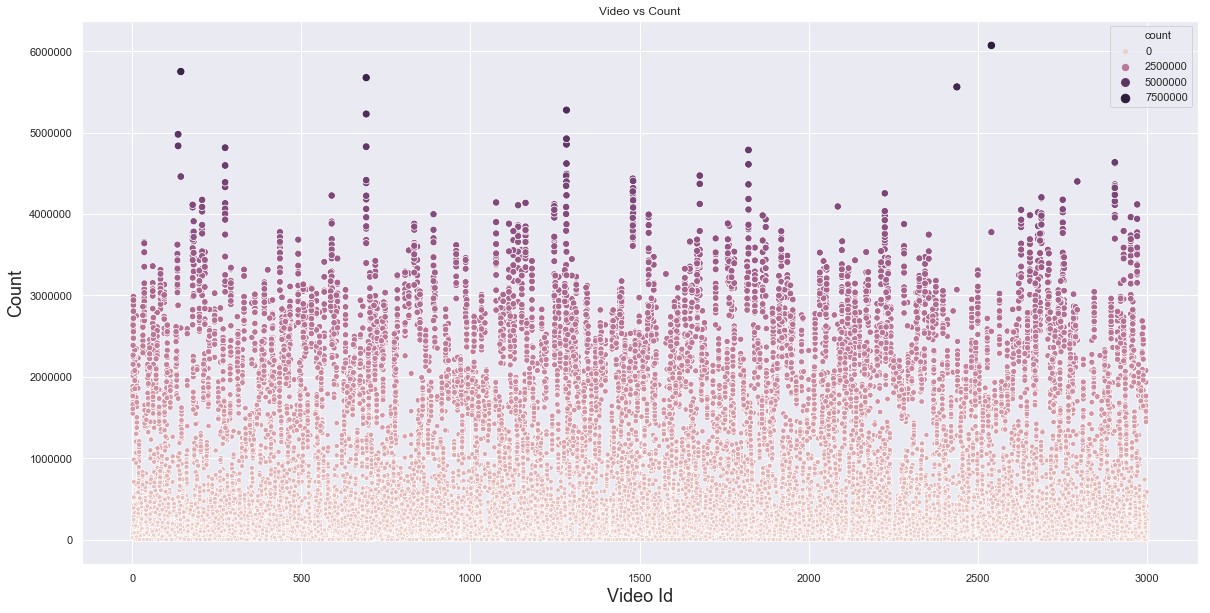

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the graph parameters
sns.set(rc={"figure.figsize": (20.0, 10.0), "axes.labelsize": 18})

ax = sns.scatterplot(x="video_id", y="count", data=video_count, size = 'count', hue="count")
ax.set_title('Video vs Count')
ax.set_xlabel('Video Id')
ax.set_ylabel('Count')

In [5]:
video_features = pd.read_csv('video_features.csv', parse_dates=['video_upload_date'])
video_features.head()

,video_id,video_length,video_language,video_upload_date,video_quality
0,2374,1760,Cn,2014-12-06,480p
1,1897,489,Cn,2014-12-10,720p
2,2386,1273,Es,2014-12-05,480p
3,2912,986,Es,2014-12-10,240p
4,2432,1050,Other,2014-12-10,480p


In [6]:
data = pd.merge(right=video_features, left=video_count, on='video_id', how='left')
data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p
3,1472,234,2015-01-04,157,Other,2014-12-10,240p
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p


In [7]:
data['days'] = (data['date'] - data['video_upload_date']).apply(lambda x: x.days)
data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p,28
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p,36
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p,22
3,1472,234,2015-01-04,157,Other,2014-12-10,240p,25
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p,20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0eb376d8>,
      dtype=object)

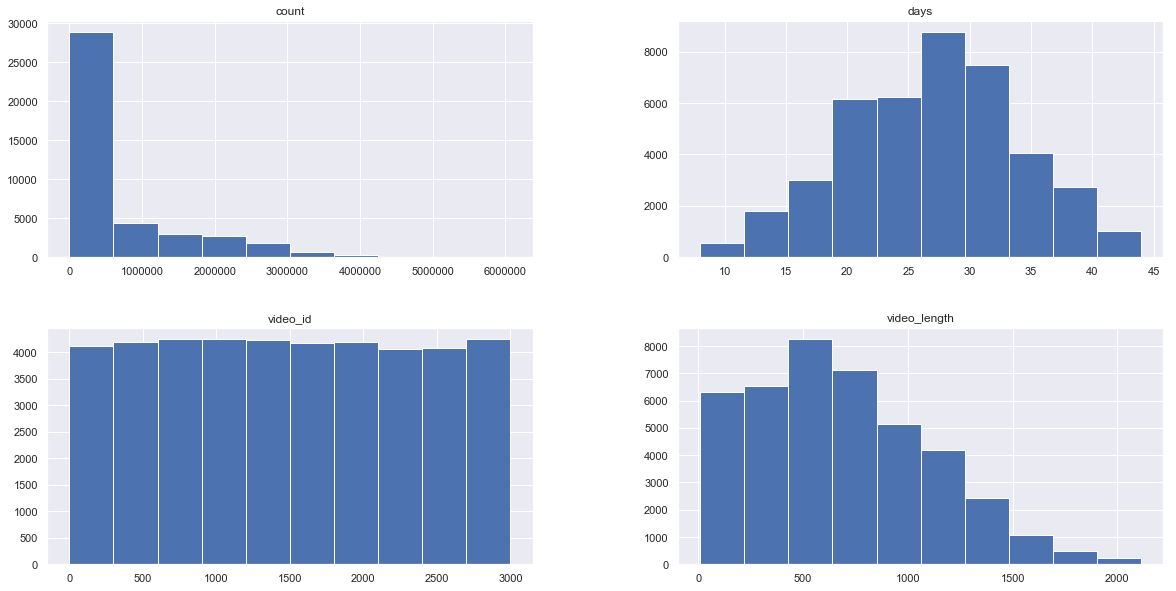

In [8]:
data.hist()

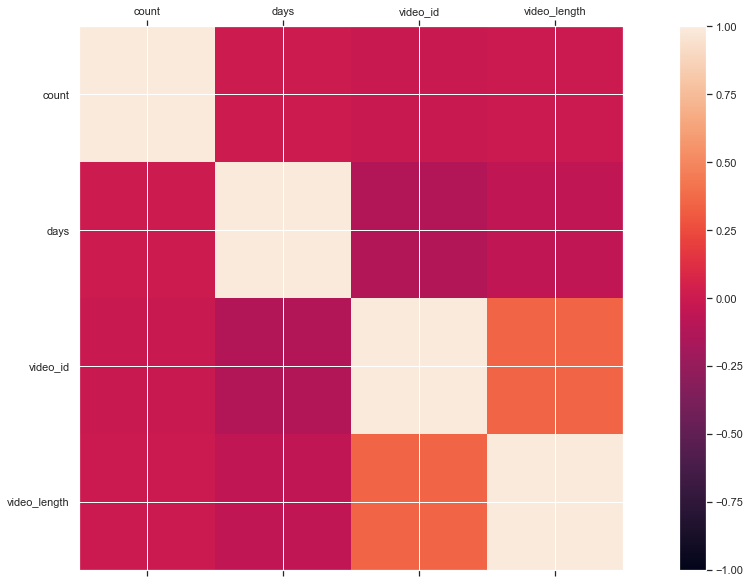

In [9]:
import numpy as np
import matplotlib.pyplot as plt
correlations = data.corr()
names = ['count', 'days', 'video_id', 'video_length']
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [10]:
# These videos can be considered as Stable and Popular 
filtered_data = data.loc[data['count'] >= 3000000]
filtered_data.shape
rows_stable= len(filtered_data)
print(rows_stable)



1024


Text(0,0.5,'Count')

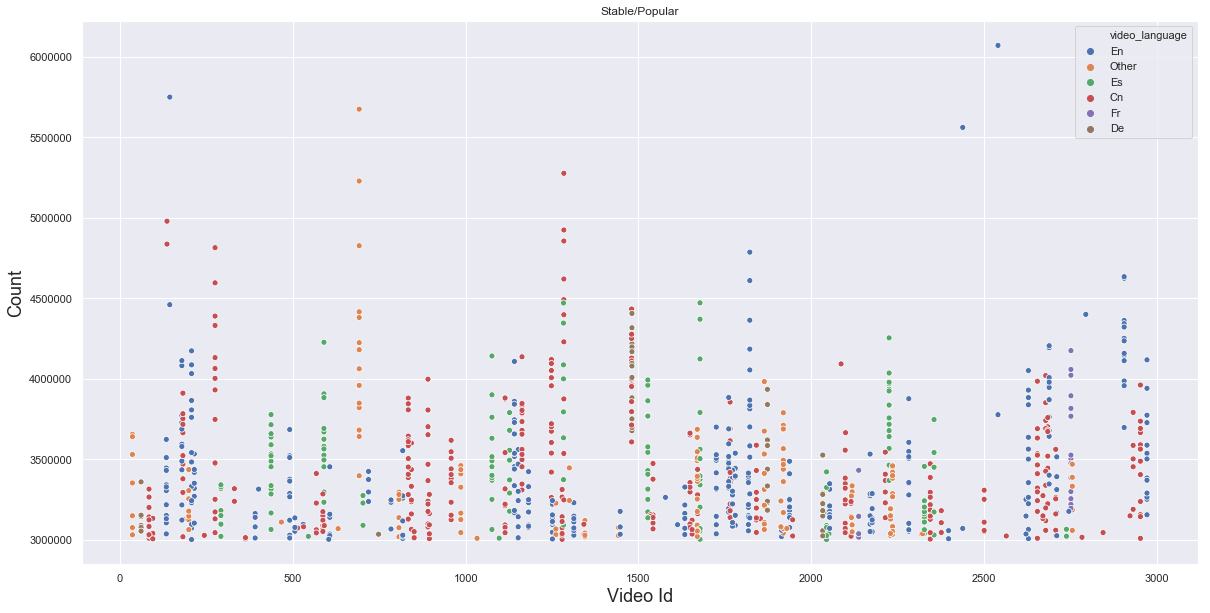

In [11]:
ax = sns.scatterplot(x="video_id", y="count", data=filtered_data, hue = 'video_language')
ax.set_title('Stable/Popular')
ax.set_xlabel('Video Id')
ax.set_ylabel('Count')

In [12]:
filtered_data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days
185,1251,3046038,2015-01-06,65,En,2014-12-16,1080p,21
226,1033,3008855,2015-01-04,459,Other,2014-12-16,360p,19
234,1818,3394931,2015-01-05,537,En,2014-12-13,720p,23
325,590,3669399,2015-01-12,424,Es,2014-12-16,480p,27
353,2628,3841157,2015-01-11,463,En,2014-12-18,720p,24


In [13]:
filtered_data_video_length = filtered_data['video_length']
filtered_data_video_length.describe()

count    1024.000000
mean      592.445312
std       319.230788
min         9.000000
25%       415.000000
50%       567.000000
75%       764.000000
max      1366.000000
Name: video_length, dtype: float64

In [14]:
filtered_data_video_quality = filtered_data['video_quality']
filtered_data_video_quality.describe()

count      1024
unique        5
top       1080p
freq        305
Name: video_quality, dtype: object

In [15]:
filtered_data_video_language = filtered_data['video_language']
filtered_data_video_language.describe()

count     1024
unique       6
top         Cn
freq       351
Name: video_language, dtype: object

In [18]:
# Calculate increase rate of the videos per day
filtered_data['increase/day'] = filtered_data['count'] / filtered_data['days']
filtered_data.head()


/Users/nehayawalkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days,increase/day
185,1251,3046038,2015-01-06,65,En,2014-12-16,1080p,21,145049.428571
226,1033,3008855,2015-01-04,459,Other,2014-12-16,360p,19,158360.789474
234,1818,3394931,2015-01-05,537,En,2014-12-13,720p,23,147605.695652
325,590,3669399,2015-01-12,424,Es,2014-12-16,480p,27,135903.666667
353,2628,3841157,2015-01-11,463,En,2014-12-18,720p,24,160048.208333


In [19]:
# We can consider video to be 'Hot' if its increase/day rate is above certain value
filtered_data2=filtered_data.loc[filtered_data['increase/day'] > 150000]
filtered_data2['Category'] = 'HOT'
filtered_data2.head()


/Users/nehayawalkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days,increase/day,Category
226,1033,3008855,2015-01-04,459,Other,2014-12-16,360p,19,158360.789474,HOT
353,2628,3841157,2015-01-11,463,En,2014-12-18,720p,24,160048.208333,HOT
371,2905,4624117,2015-01-10,420,En,2014-12-16,1080p,25,184964.680000,HOT
389,2225,3968644,2015-01-03,497,Es,2014-12-13,360p,21,188983.047619,HOT
467,2971,3532115,2015-01-02,1148,En,2014-12-14,360p,19,185900.789474,HOT


In [20]:
filtered_data2.shape
rows_hot = len(filtered_data2)
print(rows_hot)

276


In [21]:

filtered_data3 = data.loc[data['count'] < 300000]
filtered_data3.shape
rows_others= len(filtered_data3)
print(rows_others)

24236


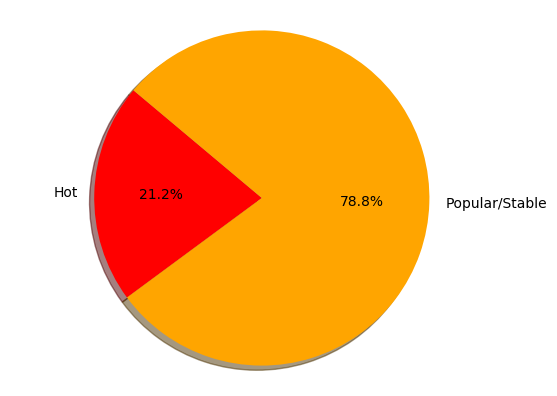

In [115]:

import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Hot', 'Popular/Stable'
sizes = [rows_hot, rows_stable ]
colors = ['Red', 'Orange']

 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

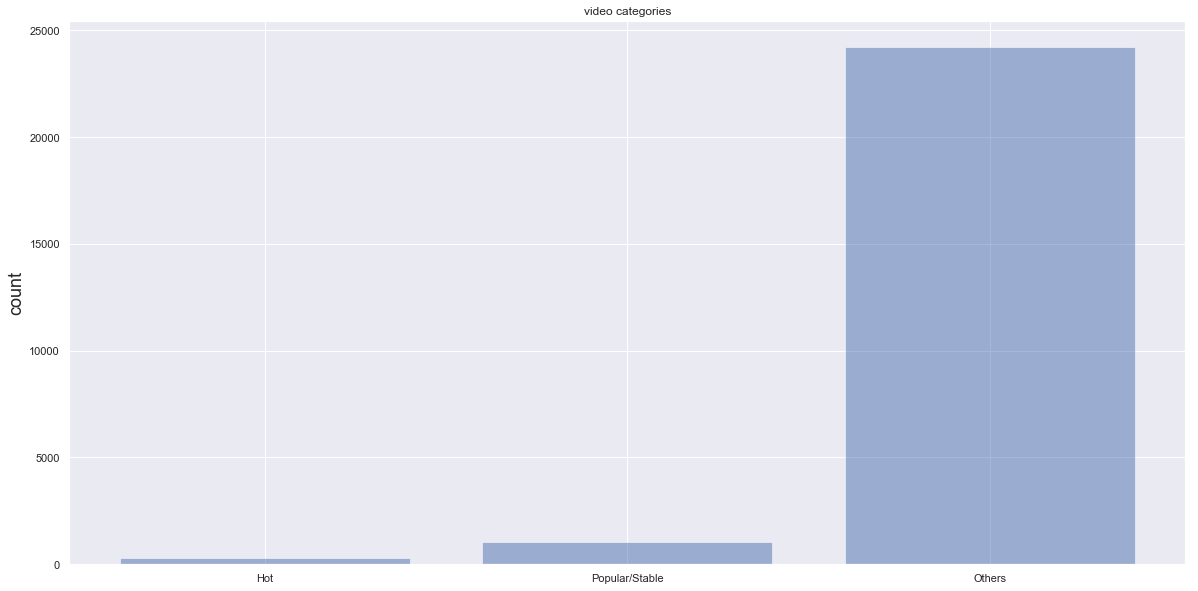

In [22]:
import matplotlib.pyplot as plt; 
import numpy as np

 
objects = ('Hot', 'Popular/Stable', 'Others')
y_pos = np.arange(len(objects))
performance = [rows_hot,rows_stable,rows_others]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.title('video categories')
plt.show()